In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os
import shutil
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from google.colab import files
import warnings
import pydot
import graphviz
import gdown


# Suppress warnings and configure TensorFlow logging
warnings.filterwarnings('ignore', category=FutureWarning)
tf.get_logger().setLevel('ERROR')


In [ ]:
# connecting my drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_path = "/content/drive/MyDrive/archive.zip"
extract_dir = "/content/data"

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extraction Complete")
print("Folders found:", os.listdir(extract_dir))

Extraction Complete
Folders found: ['1HZhs21IE2oNn_V7PF_atNDizdhV8z-vP']


In [ ]:
!ls -lh /content/data

total 844M
-rw-r--r-- 1 root root 844M Oct 21 14:02 1HZhs21IE2oNn_V7PF_atNDizdhV8z-vP


In [ ]:
zip_path = "/content/data/1HZhs21IE2oNn_V7PF_atNDizdhV8z-vP"  # the ZIP file you saw
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/data")

In [ ]:
!ls /content/data

1HZhs21IE2oNn_V7PF_atNDizdhV8z-vP  nigfoodai


In [ ]:
# splitting our data into training and validation(testing) data

base_dir = '/content/data/nigfoodai'         # where the extracted food folders are
train_dir = '/content/data_split/train'         # new training der
val_dir = '/content/data_split/validation'      # new validation folder

os.makedirs(train_dir, exist_ok=True) # basically making the folder
os.makedirs(val_dir, exist_ok=True)


for category in os.listdir(base_dir):  # os.listdir returns a string of everything in the 'base_dir'. 'category' is just a name
    category_path = os.path.join(base_dir, category) # joins the path
    if os.path.isdir(category_path):
        os.makedirs(os.path.join(train_dir, category), exist_ok=True)
        os.makedirs(os.path.join(val_dir, category), exist_ok=True)

        images = os.listdir(category_path)
        random.shuffle(images)

        train_images = images[:int(0.8 * len(images))]
        val_images = images[int(0.8 * len(images)):]

        for img in train_images:
            shutil.copy(os.path.join(category_path, img),
                os.path.join(train_dir, category, img))

        for img in val_images:
            shutil.copy(os.path.join(category_path, img),
                os.path.join(val_dir, category, img))

In [ ]:
# Data Preprocessing

train_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input
)

train_generator = train_datagen.flow_from_directory(
    "/content/data_split/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

val_generator = val_datagen.flow_from_directory(
    "/content/data_split/validation",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)


Found 2754 images belonging to 14 classes.
Found 695 images belonging to 14 classes.


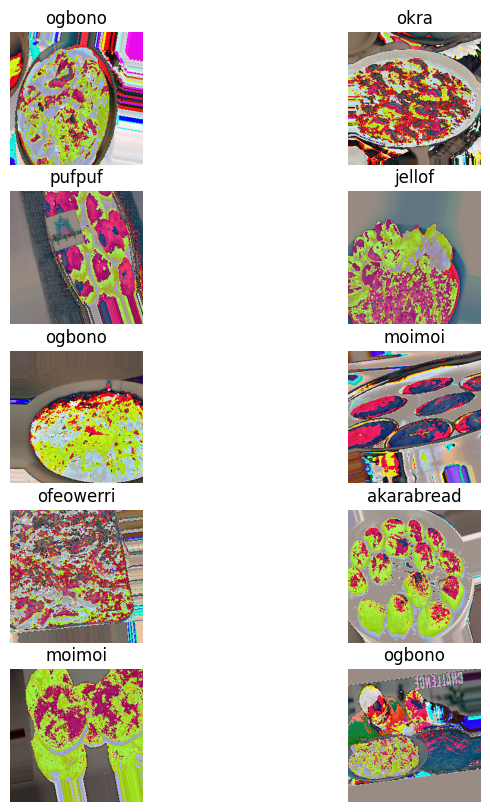

In [ ]:
class_labels = list(train_generator.class_indices.keys())
images, class_labels = next(iter(train_generator))

plt.figure(figsize=(8, 10))
for i in range(10):
    plt.subplot(5, 2, i + 1)
    plt.imshow(images[i].astype("uint8"))
    plt.title(class_labels[np.argmax(labels[i])])
    plt.axis('off')
